In [1]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

In [2]:
%matplotlib widget

In [3]:
env = Environment(latitude=32.990254, longitude=-106.974998, elevation=1400)

/home/unknown/Clubs/Launch/Misc/DeploymentMod/.direnv/python-3.12/lib/python3.12/site-packages/rocketpy/mathutils/function.py:3125: UserWarning: Extrapolation method set to 'constant' because the linear method is not supported.
  warnings.warn(


In [4]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

In [5]:
env.set_atmospheric_model(type="Forecast", file="GFS")


Gravity Details

Acceleration of gravity at surface level:    9.7911 m/s²
Acceleration of gravity at   5.000 km (ASL): 9.7802 m/s²


Launch Site Details

Launch Date: 2024-08-15 12:00:00 UTC
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 5.000 km
Forecast Time Period: from 2024-08-14 18:00:00 to 2024-08-30 18:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 128.95 m/s
Surface Wind Direction: 308.95°
Surface Wind Heading: 4.02°
Surface Pressure: 854.05 hPa
Surface Temperature: 298.91 K
Surface Air Density: 0.995 kg/m³
Surface Speed of Sound: 346.59 m/s


Earth Model Details

Earth Radius at Launch 

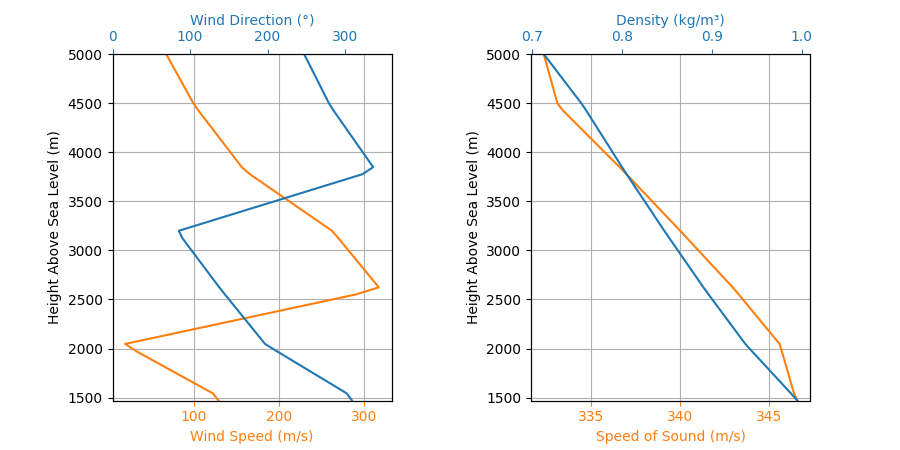

In [6]:
env.max_expected_height = 5000  # adjust the plots to this height
env.info()

In [7]:
Pro75M1670 = SolidMotor(
    thrust_source="data/Cesaroni_7579M1520-P.eng",
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=5,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=3.9,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

Nozzle Details
Nozzle Radius: 0.033 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.591 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Average Propellant Exhaust Velocity: 2217.026 m/s
Average Thrust: 1680.342 N
Maximum Thrust: 1827.113 N at 1.652 s after ignition.
Total Impulse: 6553.334 Ns



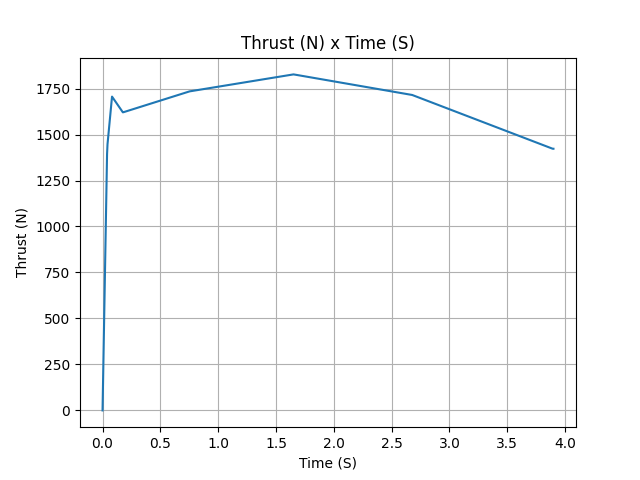

In [8]:
Pro75M1670.info()

In [9]:
calisto = Rocket(
    radius=127 / 2000,
    mass=14.426,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="data/calisto/powerOffDragCurve.csv",
    power_on_drag="data/calisto/powerOnDragCurve.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

rail_buttons = calisto.set_rail_buttons(
    upper_button_position=0.0818,
    lower_button_position=-0.618,
    angular_position=45,
)


In [10]:
calisto.add_motor(Pro75M1670, position=-1.255)

In [11]:
nose_cone = calisto.add_nose(length=0.55829, kind="vonKarman", position=1.278)

fin_set = calisto.add_trapezoidal_fins(
    n=4,
    root_chord=0.120,
    tip_chord=0.060,
    span=0.110,
    position=-1.04956,
    cant_angle=0.5,
    airfoil=("data/calisto/NACA0012-radians.csv", "radians"),
)

tail = calisto.add_tail(
    top_radius=0.0635, bottom_radius=0.0435, length=0.060, position=-1.194656
)


Inertia Details

Rocket Mass: 14.426 kg (without motor)
Rocket Dry Mass: 16.241 kg (with unloaded motor)
Rocket Loaded Mass: 19.197 kg
Rocket Inertia (with unloaded motor) 11: 7.864 kg*m2
Rocket Inertia (with unloaded motor) 22: 7.864 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.036 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.0635 m
Rocket Frontal Area: 0.012668 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.105 m
Rocket Center of Dry Mass - Nozzle Exit: 1.150 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.753 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.116 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 6.280/rad
Tail Lift Coefficient Derivative: -1.061/rad

Center of Pres

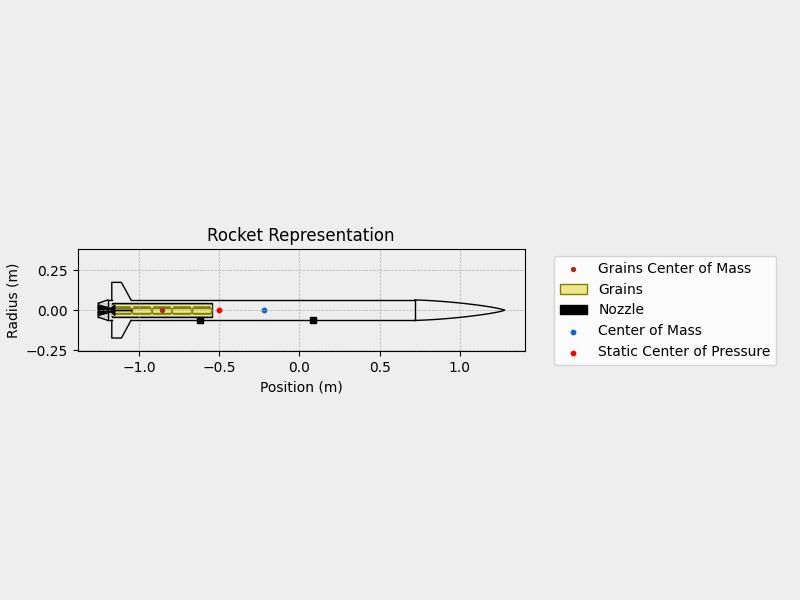


Mass Plots
----------------------------------------


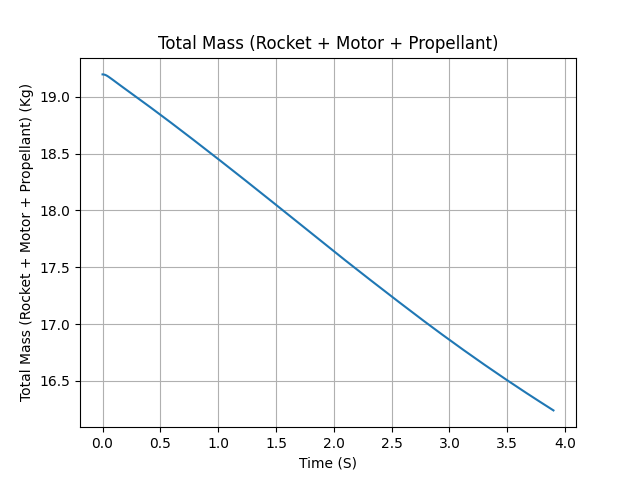

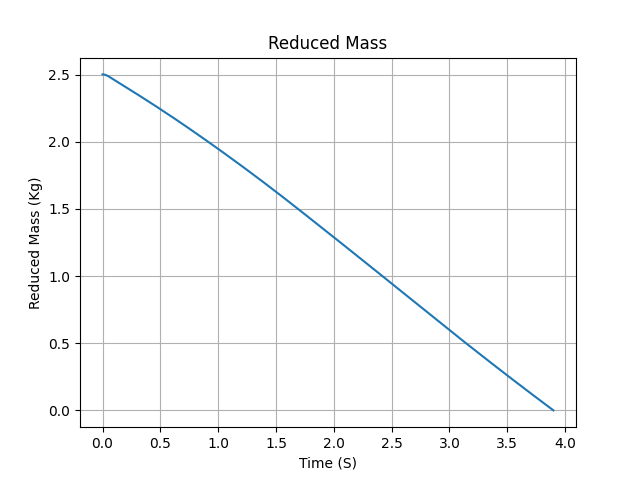


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


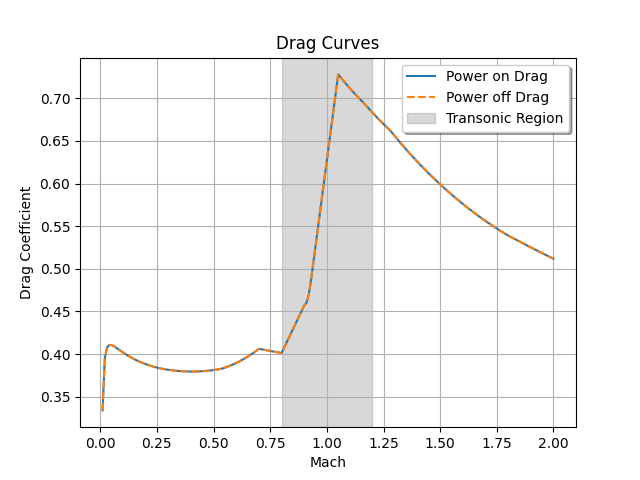


Stability Plots
--------------------


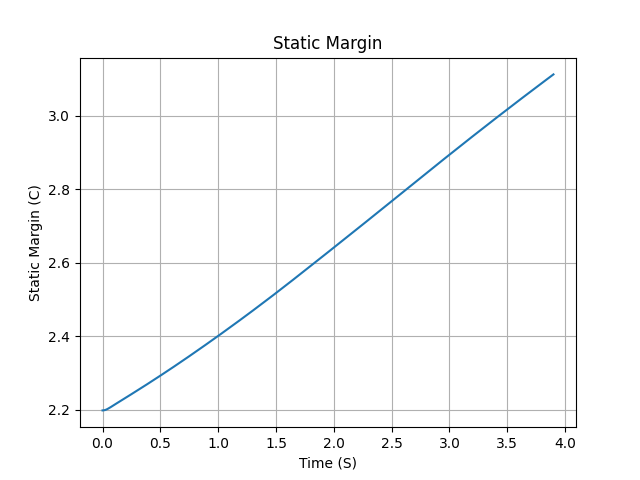

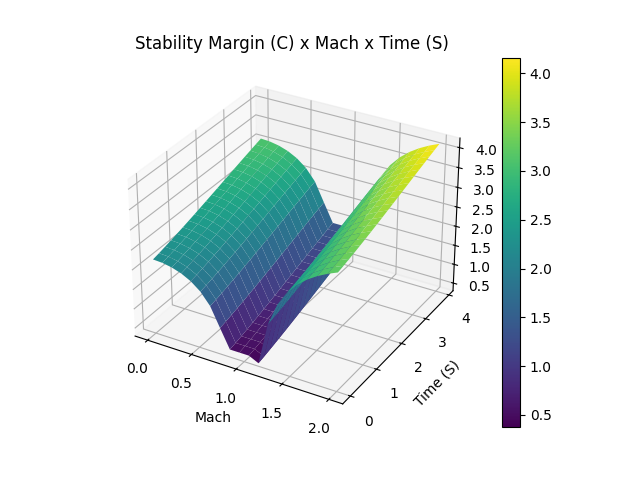


Thrust-to-Weight Plot
----------------------------------------


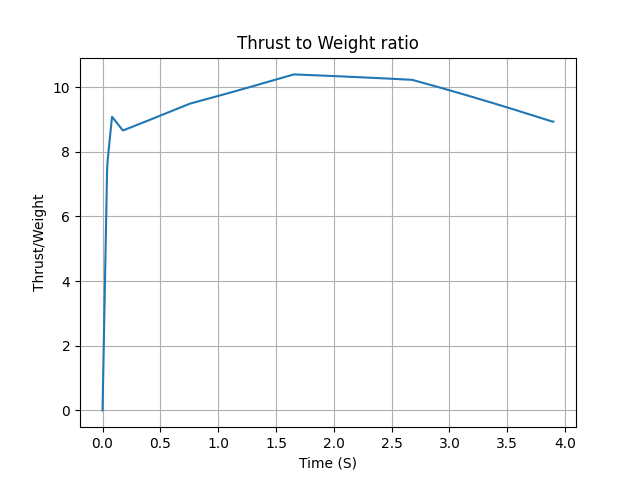

In [12]:
calisto.all_info()

In [13]:
Main = calisto.add_parachute(
    "Main",
    cd_s=10.0,
    trigger=800,
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Drogue = calisto.add_parachute(
    "Drogue",
    cd_s=1.0,
    trigger="apogee",
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

In [14]:
test_flight = Flight(
    rocket=calisto, environment=env, rail_length=5.2, inclination=85, heading=0
)



Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 1471.47 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.999 | e1: -0.044 | e2: 0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 2.199 c


Surface Wind Conditions

Frontal Surface Wind Speed: 2.53 m/s
Lateral Surface Wind Speed: 3.13 m/s


Launch Rail

Launch Rail Length: 5.2 m
Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.345 s
Rail Departure Velocity: 24.282 m/s
Rail Departure Stability Margin: 2.255 c
Rail Departure Angle of Attack: 9.494°
Rail Departure Thrust-Weight Ratio: 8.896
Rail Departure Reynolds Number: 1.675e+05


Burn out State

Burn out time: 3.900 s
Altitude at burn out: 2090.176 m (ASL) | 618.710 m (AGL)
Rocket speed at burn out: 313.013 m/s
Freestream velocit

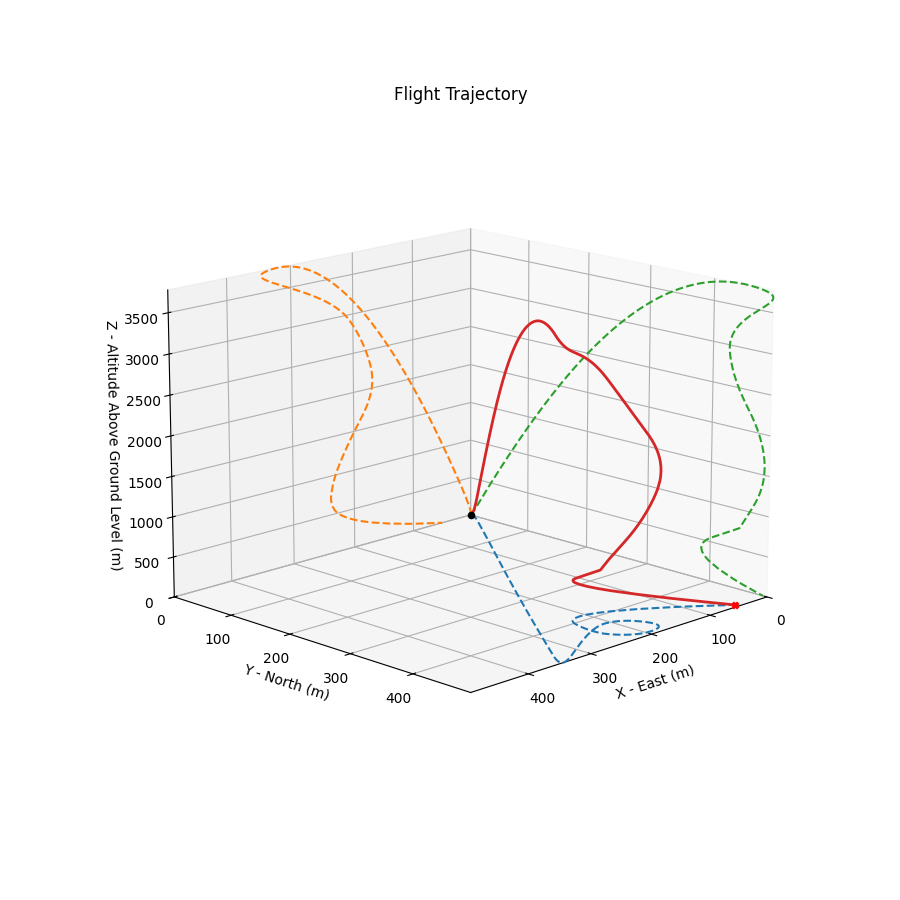



Trajectory Kinematic Plots



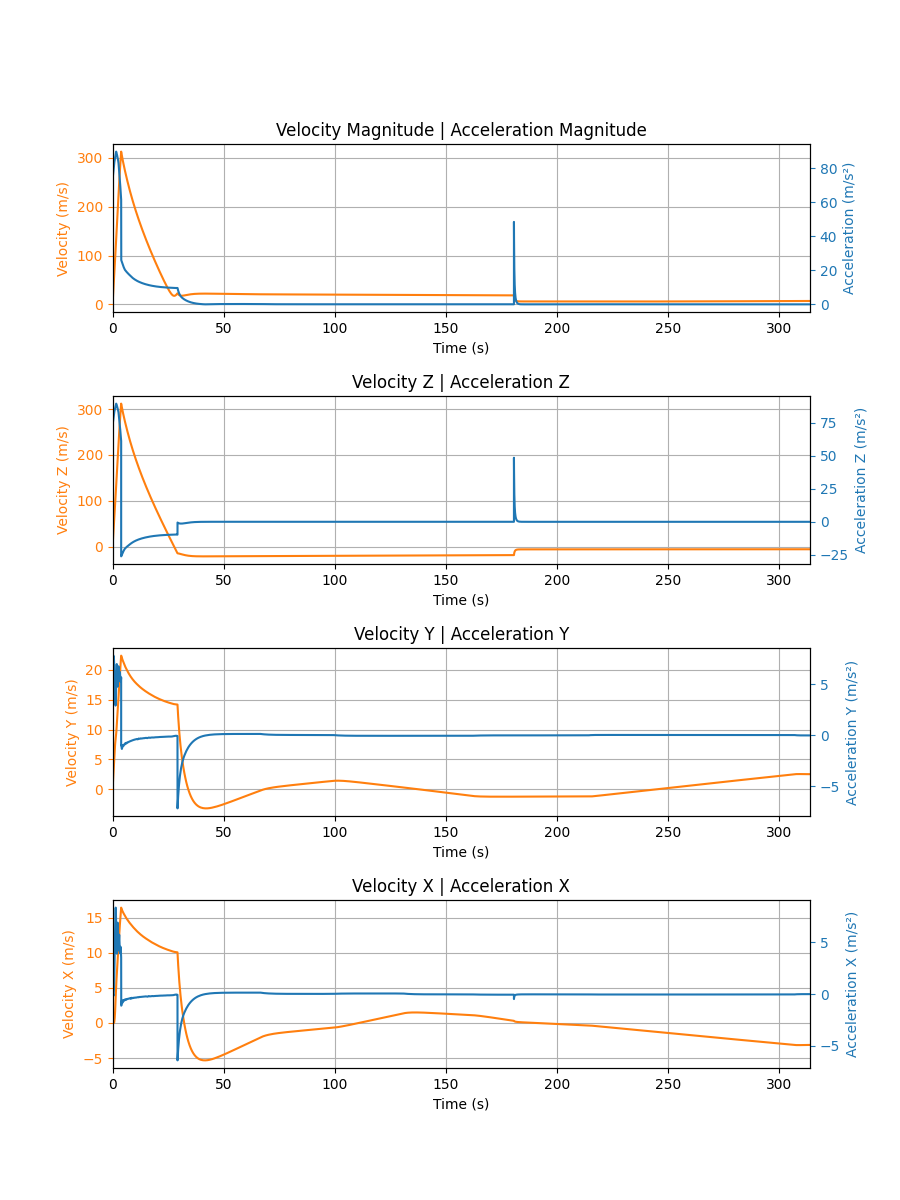



Angular Position Plots



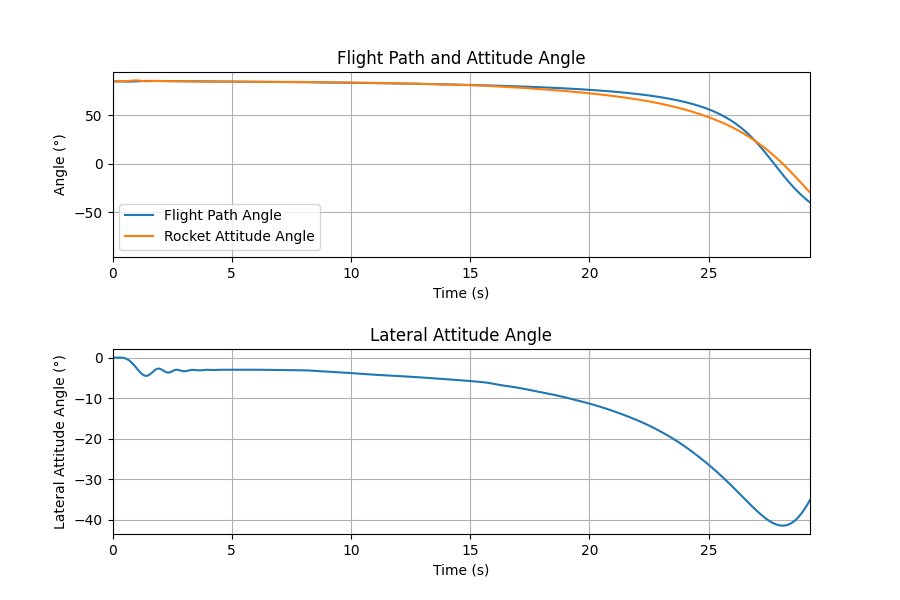



Path, Attitude and Lateral Attitude Angle plots



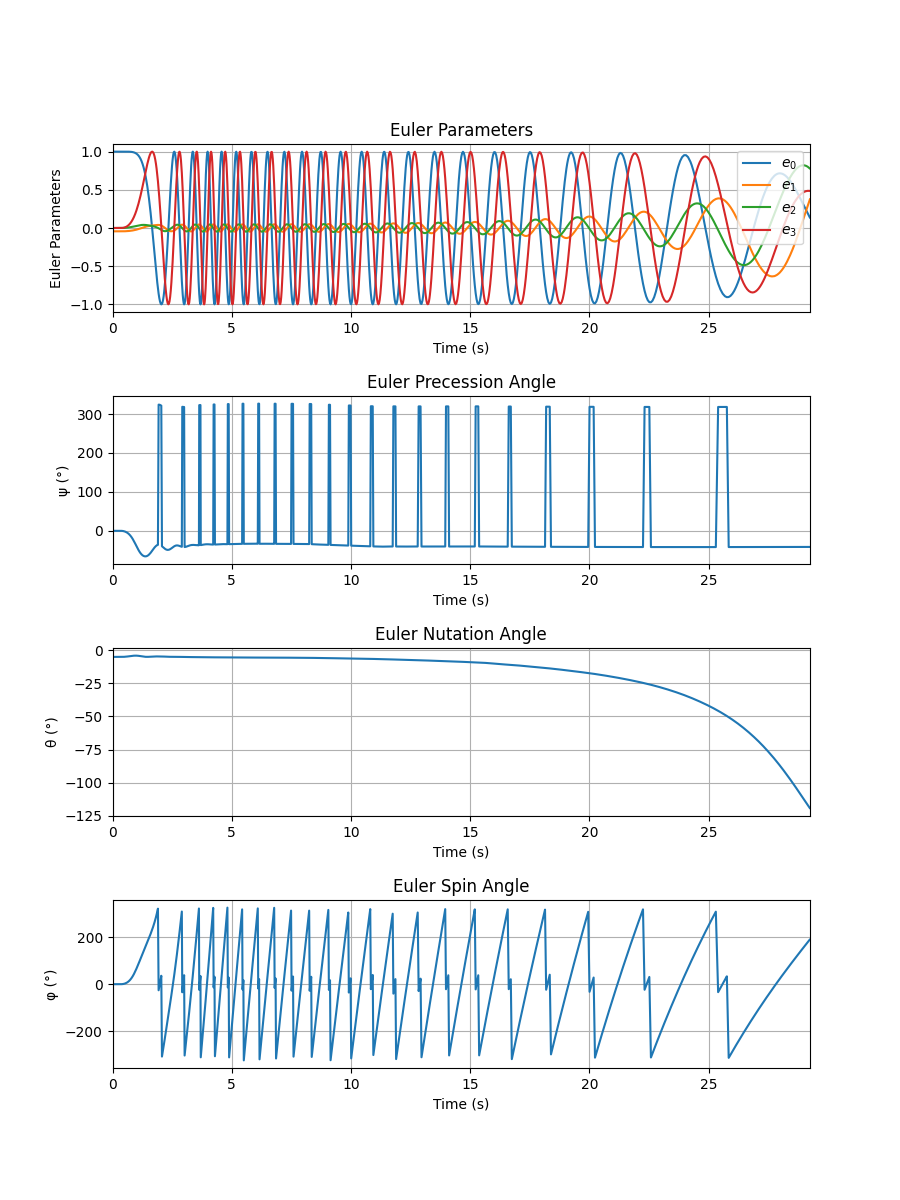



Trajectory Angular Velocity and Acceleration Plots



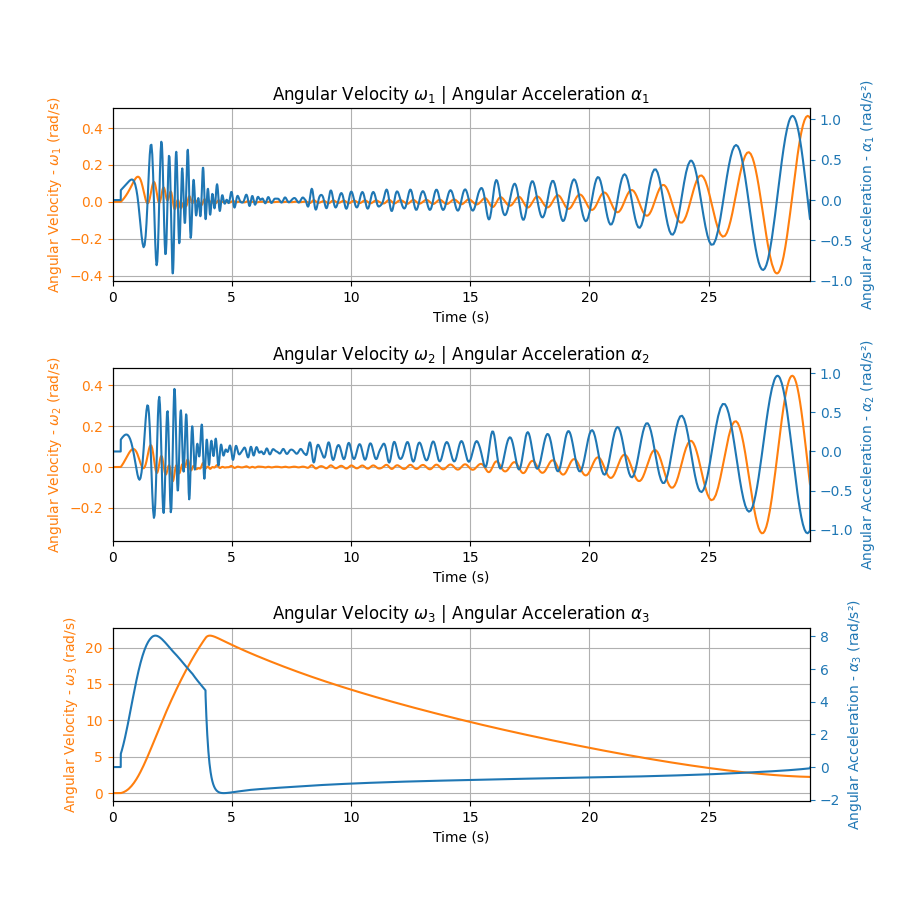



Aerodynamic Forces Plots



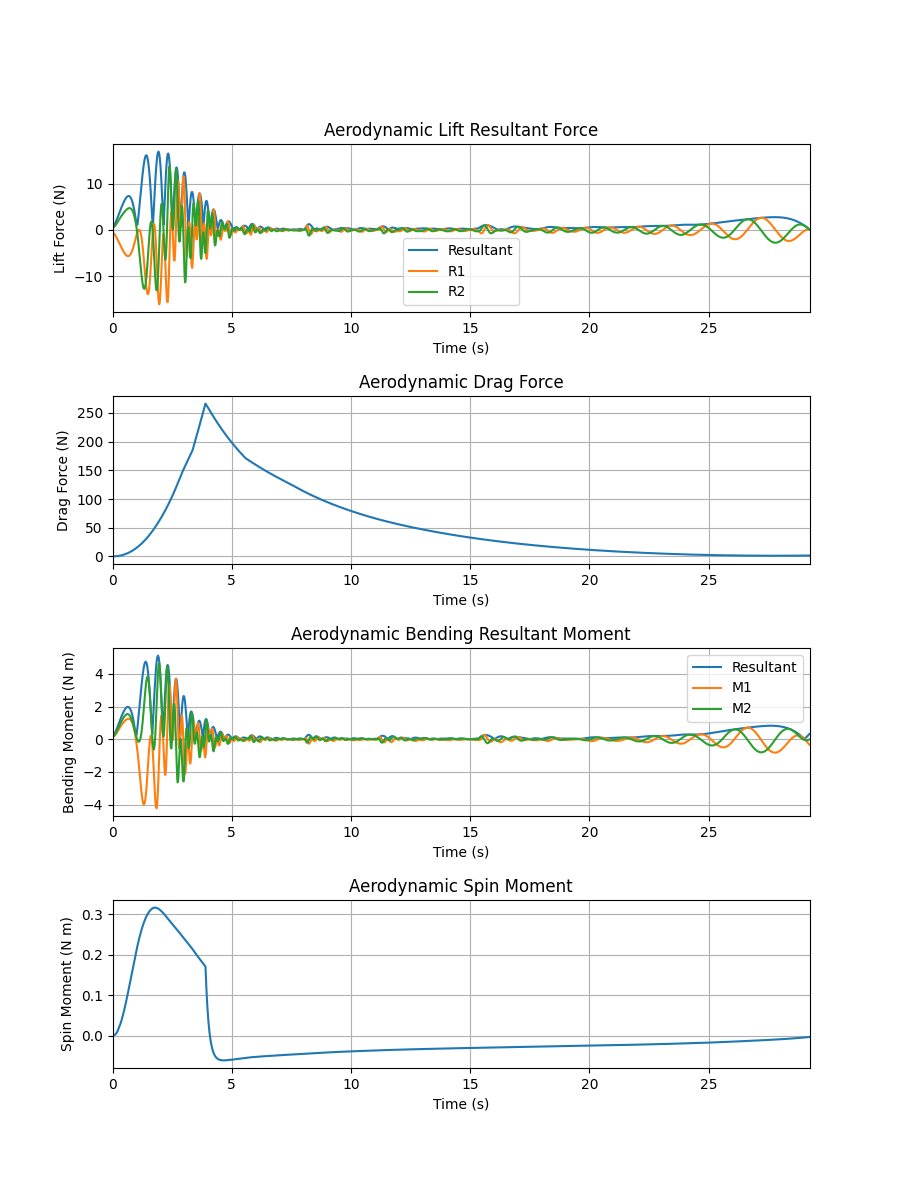



Rail Buttons Forces Plots



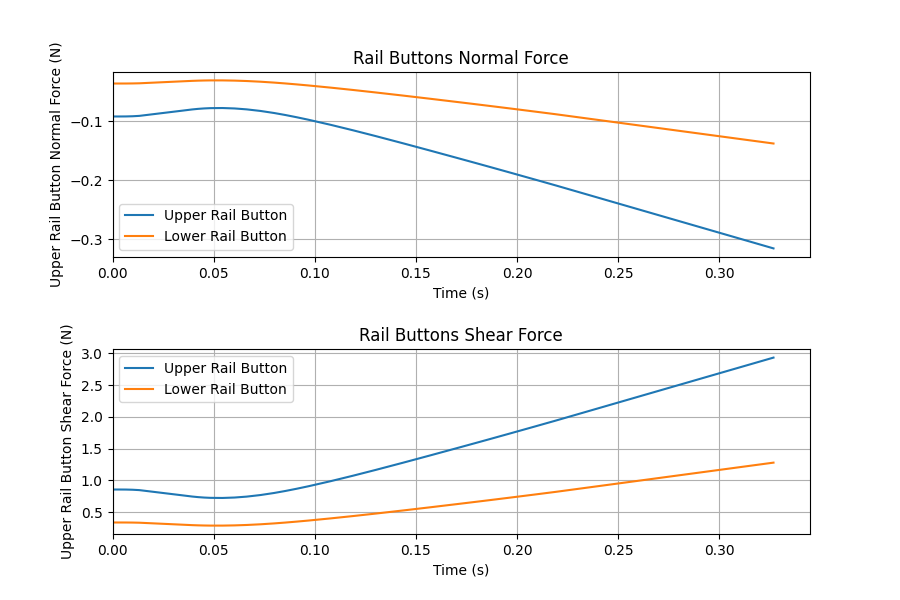



Trajectory Energy Plots



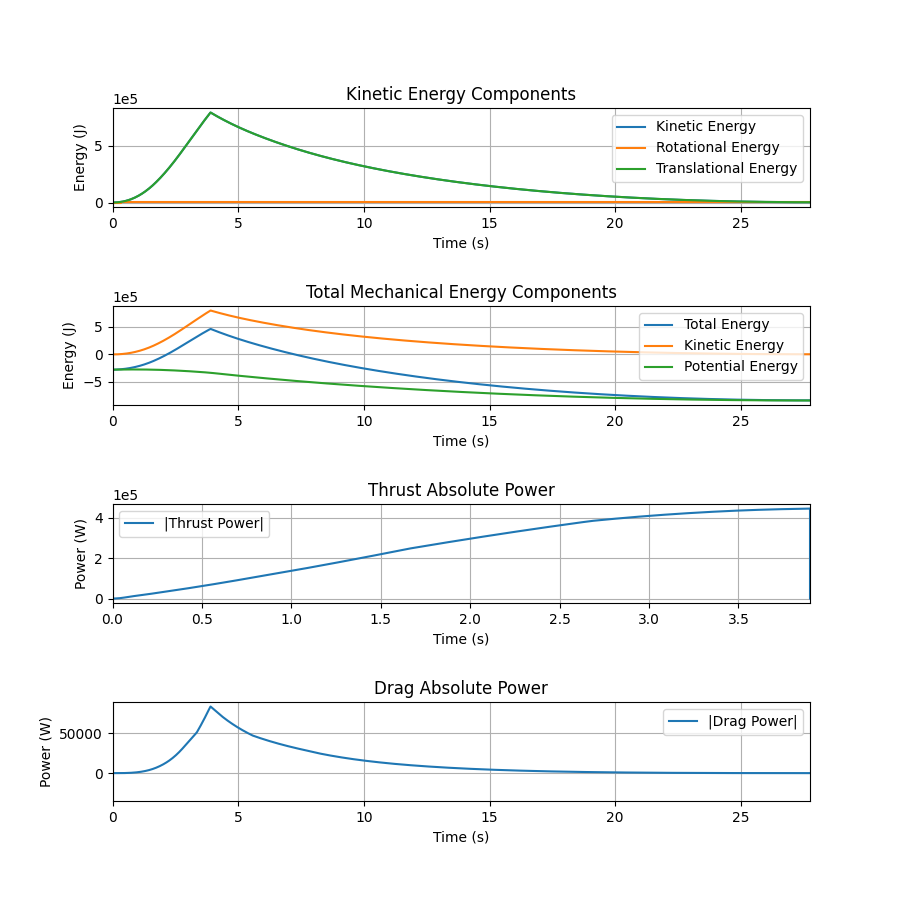



Trajectory Fluid Mechanics Plots



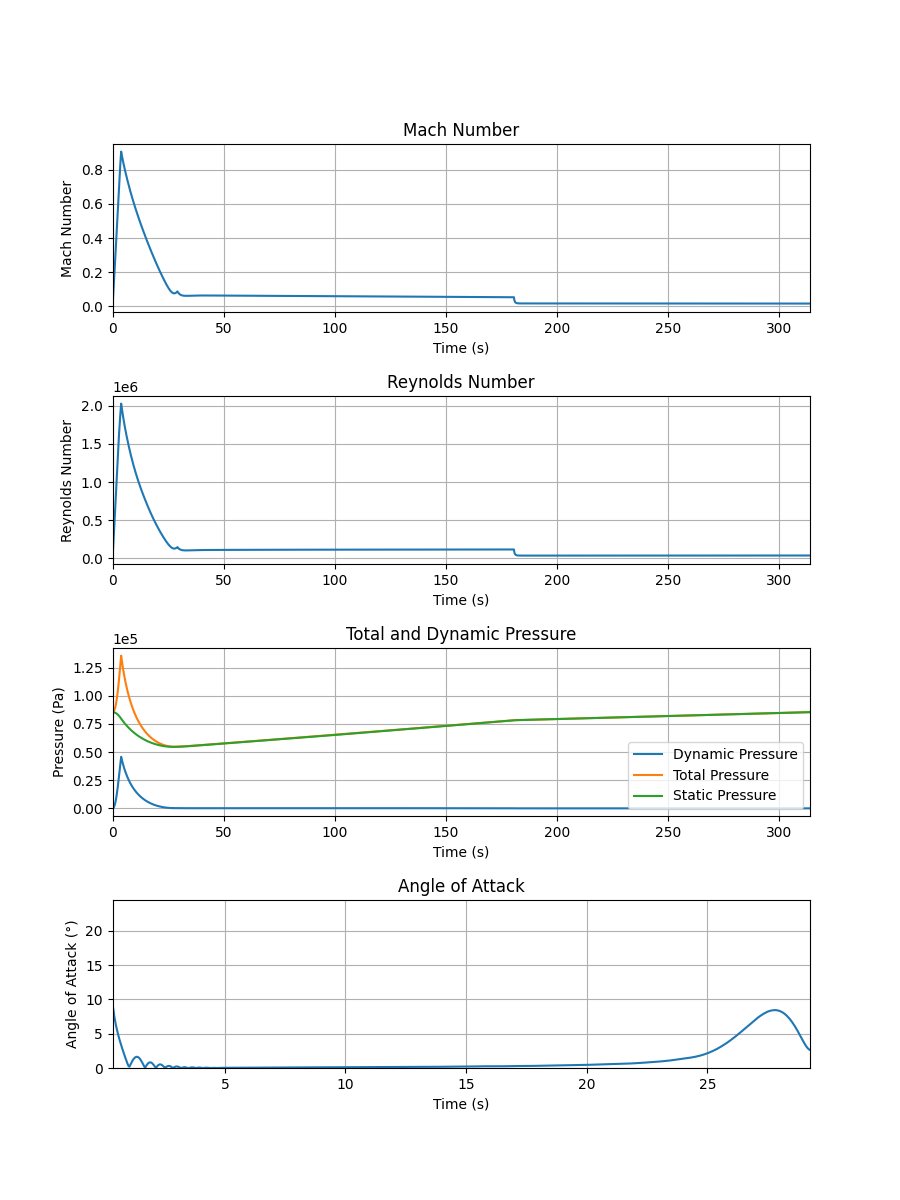



Trajectory Stability and Control Plots



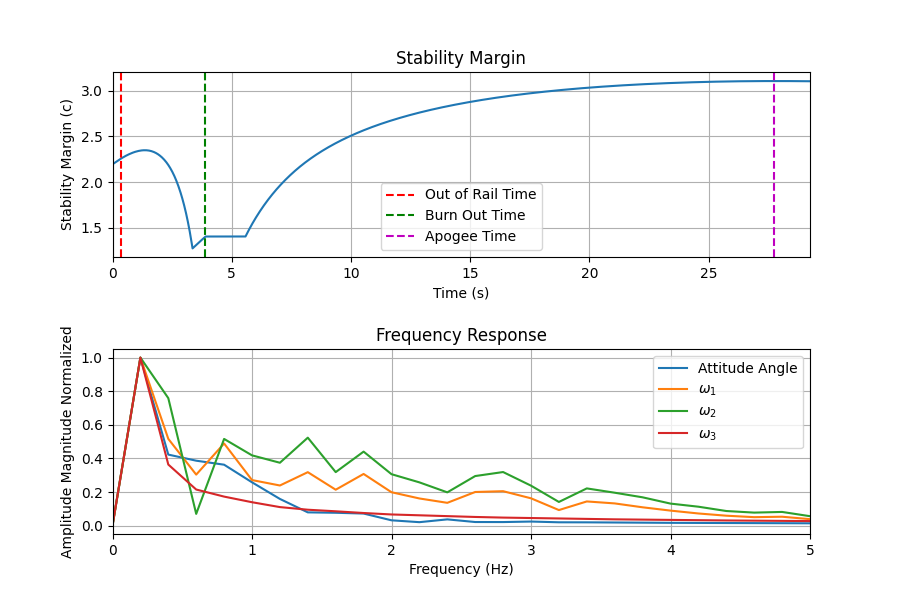



Rocket and Parachute Pressure Plots



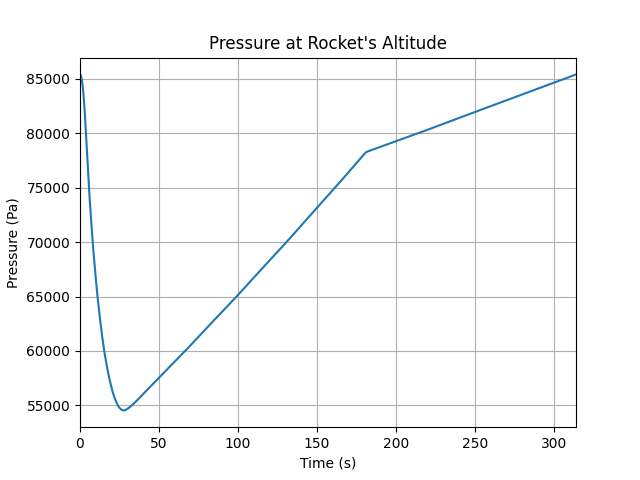


Parachute:  Main


/home/unknown/Clubs/Launch/Misc/DeploymentMod/.direnv/python-3.12/lib/python3.12/site-packages/rocketpy/mathutils/function.py:1251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


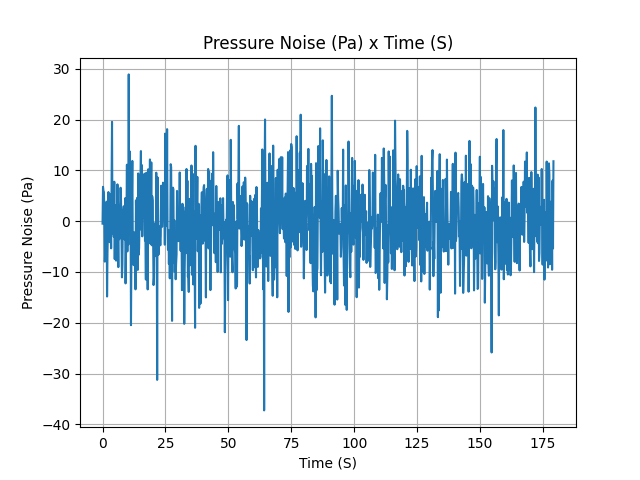

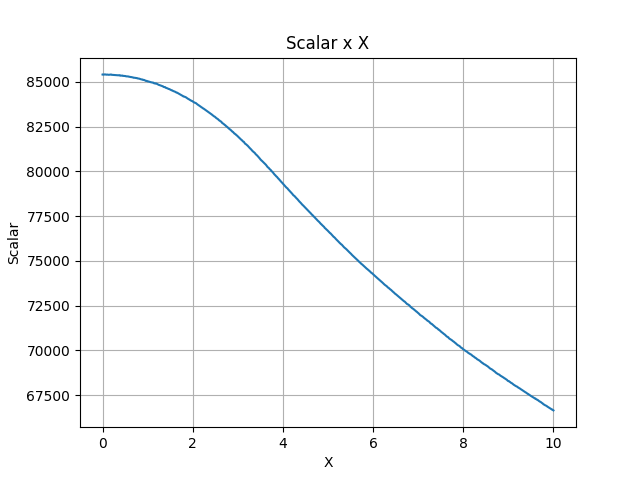

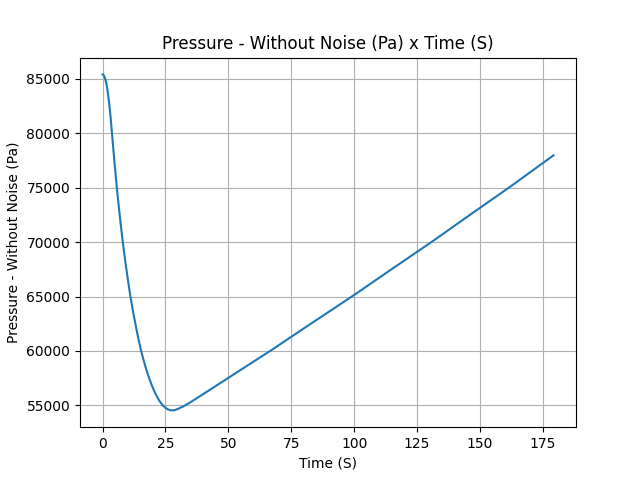


Parachute:  Drogue


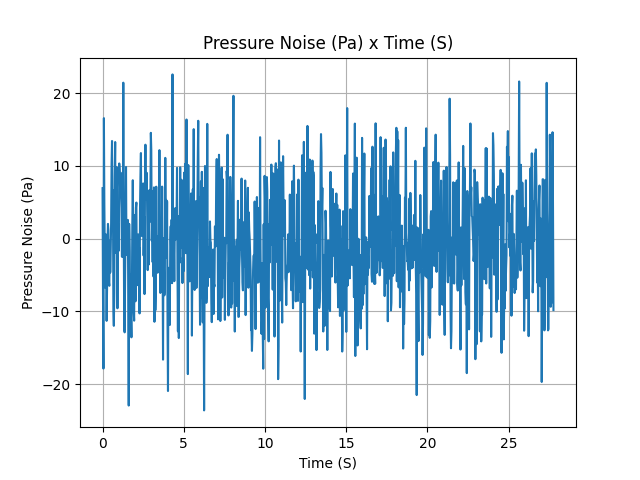

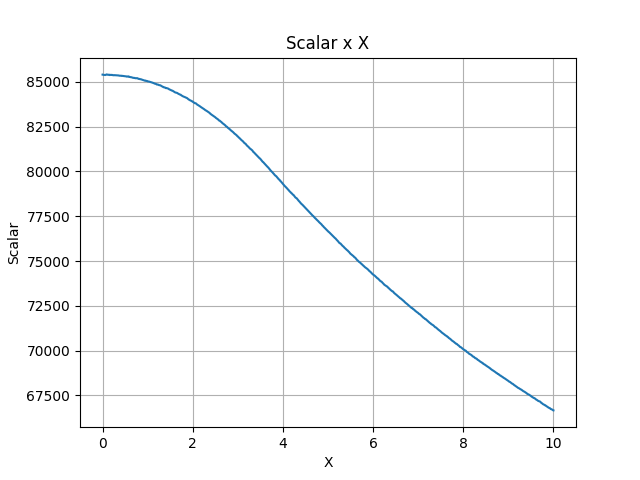

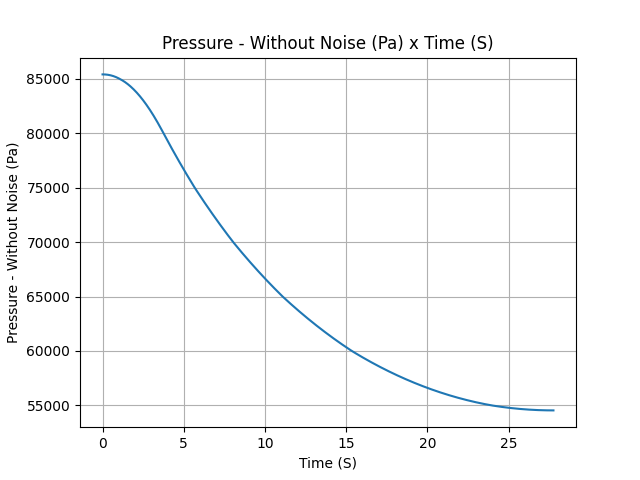

In [15]:
test_flight.all_info()